In [122]:
import numpy as np
import pandas as pd
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools as smt
import sklearn.linear_model as slm
import sklearn.preprocessing as sp
import seaborn as sns
import pacmap 
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix



In [86]:
train_study= pd.read_csv('framingham_train.csv')
test_study = pd.read_csv('framingham_test.csv')
train_study.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,46,High school/GED,0,0,0,0,0,0,225,116.0,79.0,29.21,60,70,0
1,0,37,Some college/vocational school,1,20,0,0,0,0,254,119.0,62.5,28.78,70,69,0
2,1,60,Some high school,0,0,0,0,1,0,270,145.0,81.0,29.37,75,73,0
3,0,66,Some high school,0,0,1,0,1,0,290,152.5,90.0,23.63,80,76,0
4,0,36,High school/GED,0,0,0,0,0,0,212,102.0,69.0,33.36,55,71,0


In [87]:
train_enc=pd.get_dummies(train_study)
test_enc = pd.get_dummies(test_study)
train_enc.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_College,education_High school/GED,education_Some college/vocational school,education_Some high school
0,0,46,0,0,0,0,0,0,225,116.0,79.0,29.21,60,70,0,0,1,0,0
1,0,37,1,20,0,0,0,0,254,119.0,62.5,28.78,70,69,0,0,0,1,0
2,1,60,0,0,0,0,1,0,270,145.0,81.0,29.37,75,73,0,0,0,0,1
3,0,66,0,0,1,0,1,0,290,152.5,90.0,23.63,80,76,0,0,0,0,1
4,0,36,0,0,0,0,0,0,212,102.0,69.0,33.36,55,71,0,0,1,0,0


In [88]:
cols = list(train_enc.columns)
a, b = cols.index('TenYearCHD'), cols.index('education_Some high school')
cols[b], cols[a] = cols[a], cols[b]
train_enc = train_enc[cols]

In [89]:
cols_test = list(test_enc.columns)
a, b = cols_test.index('TenYearCHD'), cols_test.index('education_Some high school')
cols_test[b], cols_test[a] = cols_test[a], cols_test[b]
test_enc = test_enc[cols_test]

In [90]:
train_enc.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_Some high school,education_College,education_High school/GED,education_Some college/vocational school,TenYearCHD
0,0,46,0,0,0,0,0,0,225,116.0,79.0,29.21,60,70,0,0,1,0,0
1,0,37,1,20,0,0,0,0,254,119.0,62.5,28.78,70,69,0,0,0,1,0
2,1,60,0,0,0,0,1,0,270,145.0,81.0,29.37,75,73,1,0,0,0,0
3,0,66,0,0,1,0,1,0,290,152.5,90.0,23.63,80,76,1,0,0,0,0
4,0,36,0,0,0,0,0,0,212,102.0,69.0,33.36,55,71,0,0,1,0,0


In [91]:
train_enc.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_Some high school,education_College,education_High school/GED,education_Some college/vocational school,TenYearCHD
count,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.00000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000
mean,0.431250,49.760156,0.478906,8.615625,0.031250,0.006641,0.312109,0.028516,236.773438,132.583984,82.83457,25.833363,75.840625,81.962500,0.420703,0.111719,0.298438,0.169141,0.153125
std,0.495348,8.623440,0.499652,11.568201,0.174027,0.081235,0.463445,0.166473,43.258823,22.711521,12.09937,4.132052,12.159179,23.109323,0.493768,0.315082,0.457662,0.374949,0.360178
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,83.500000,48.00000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.50000,23.090000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.00000,25.400000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,57.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.00000,28.072500,83.000000,87.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,70.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,464.000000,295.000000,142.50000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


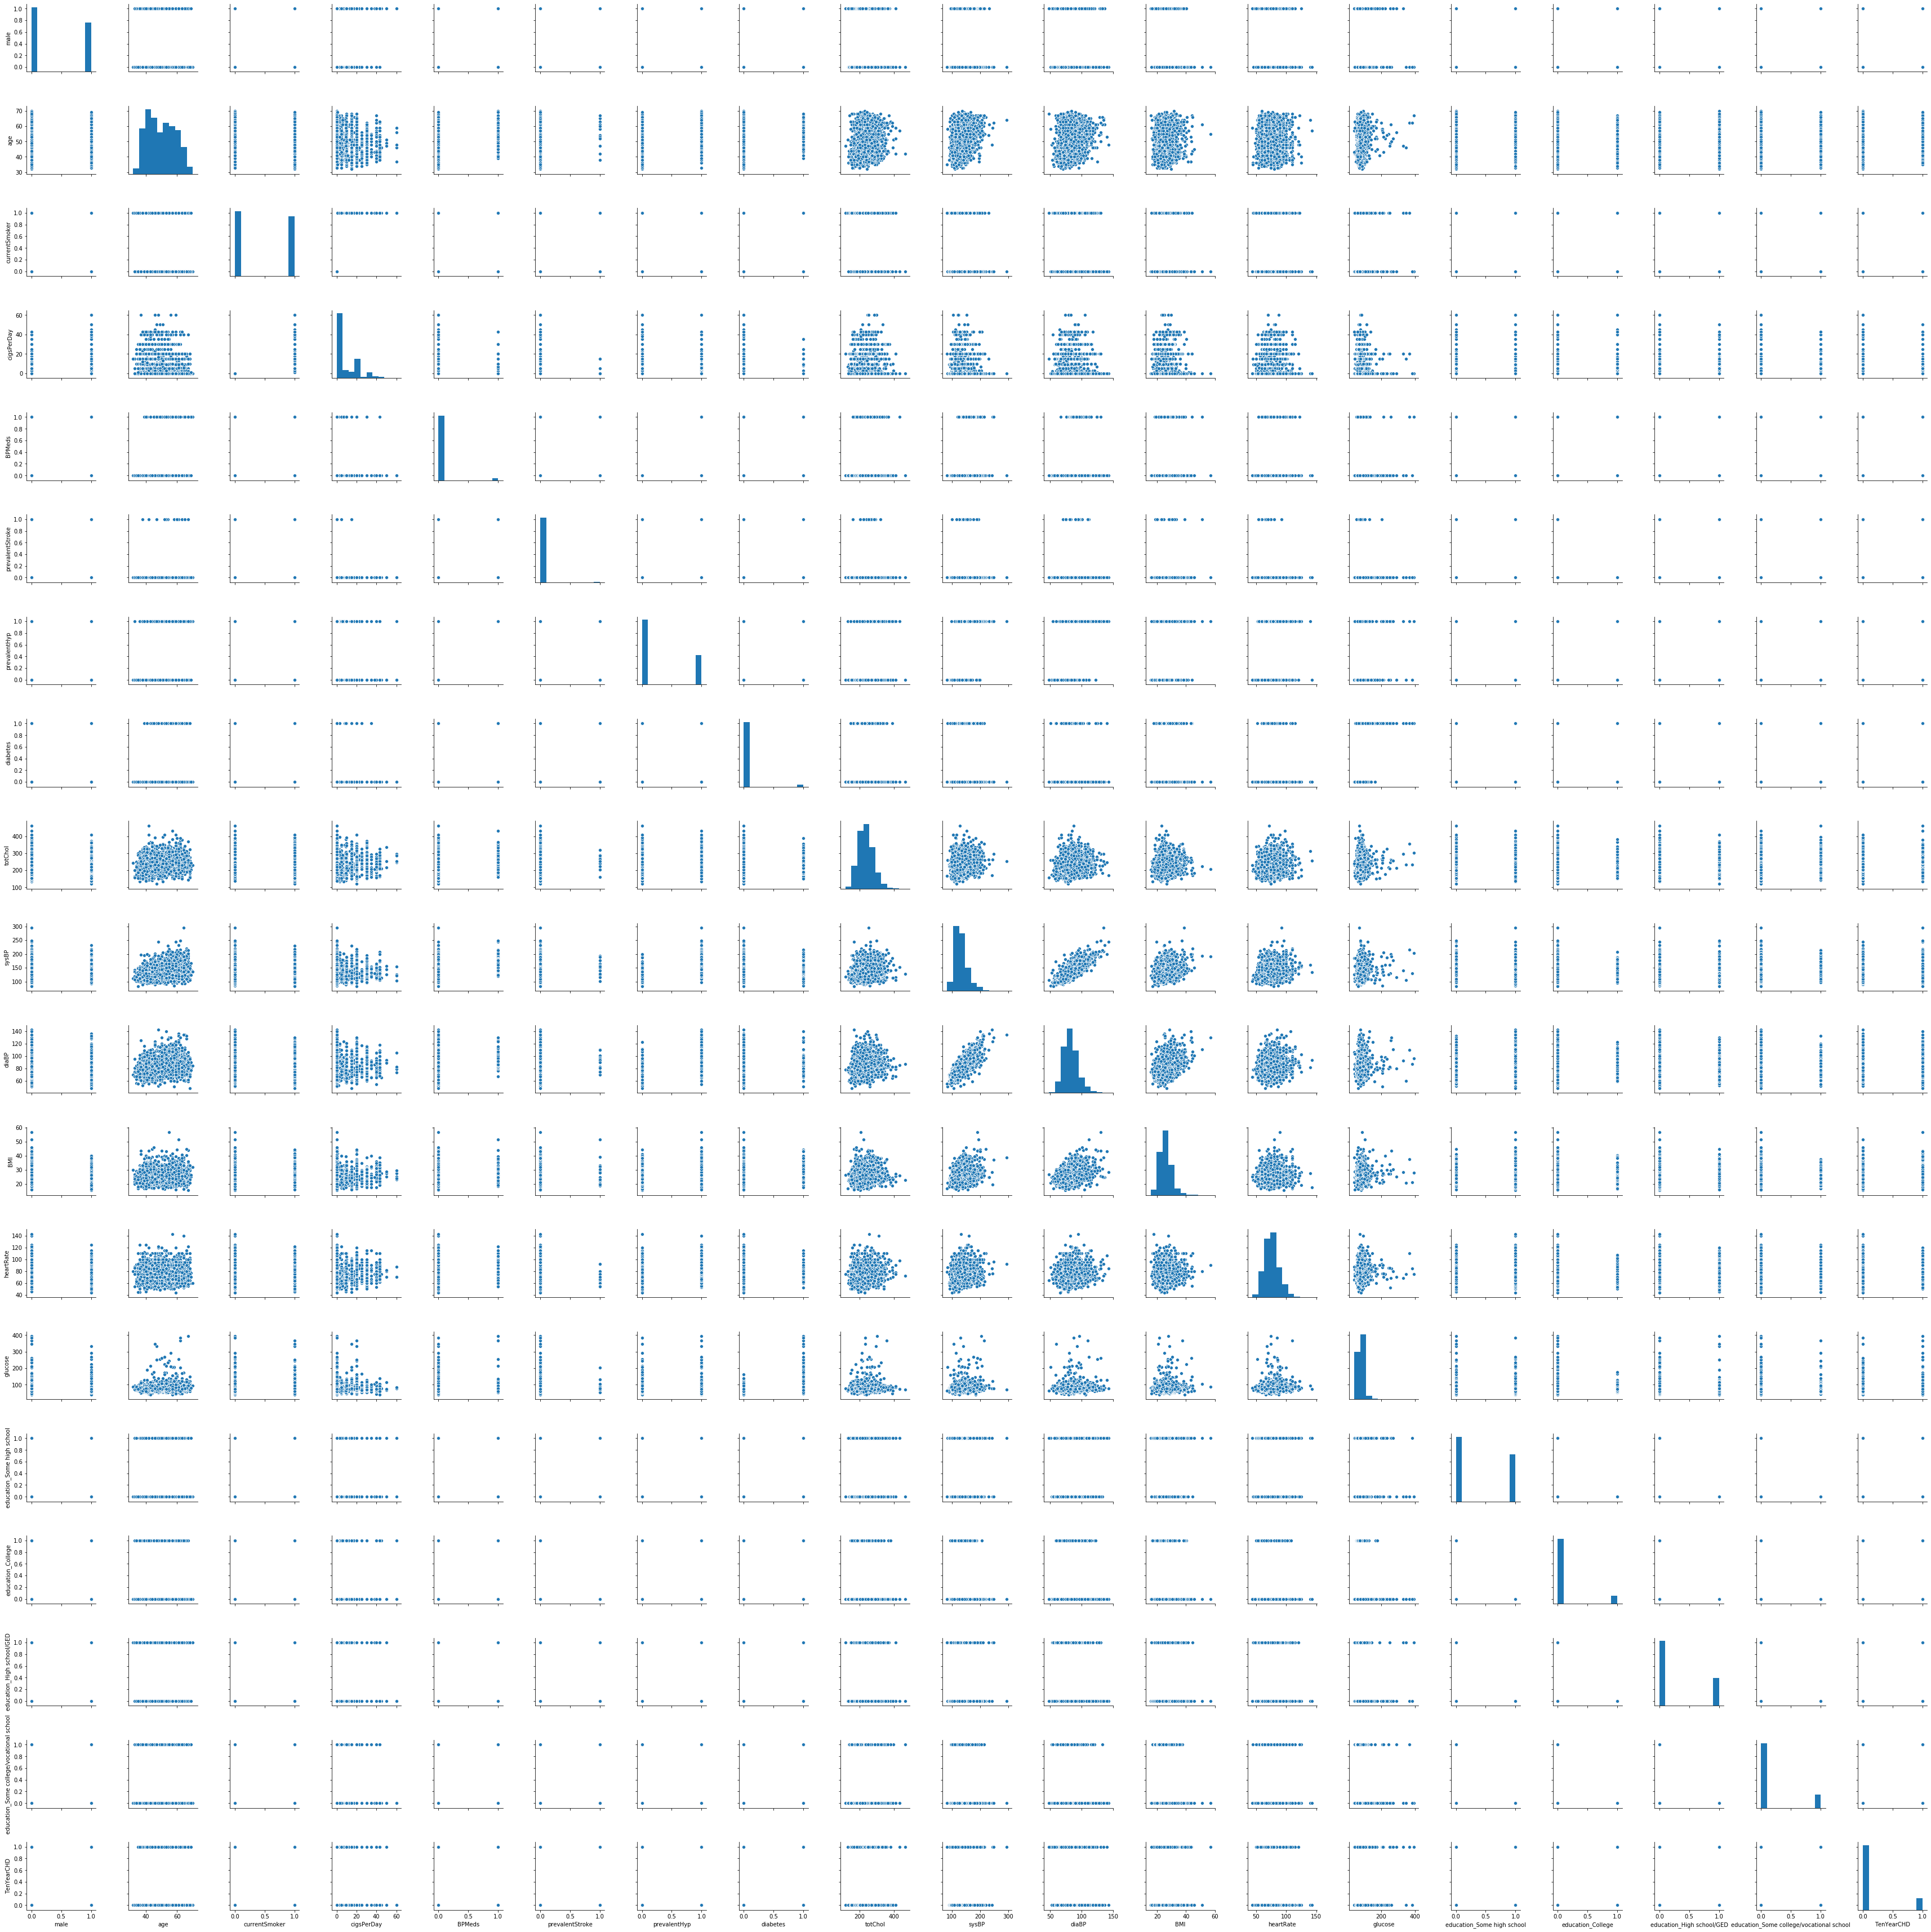

In [92]:
sns.pairplot(train_enc, kind="scatter")

In [93]:
X_train=train_enc[list(train_enc.columns[0:18])]
Y_train=train_enc[["TenYearCHD"]]
X_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_Some high school,education_College,education_High school/GED,education_Some college/vocational school
0,0,46,0,0,0,0,0,0,225,116.0,79.0,29.21,60,70,0,0,1,0
1,0,37,1,20,0,0,0,0,254,119.0,62.5,28.78,70,69,0,0,0,1
2,1,60,0,0,0,0,1,0,270,145.0,81.0,29.37,75,73,1,0,0,0
3,0,66,0,0,1,0,1,0,290,152.5,90.0,23.63,80,76,1,0,0,0
4,0,36,0,0,0,0,0,0,212,102.0,69.0,33.36,55,71,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1,40,1,43,0,0,0,0,238,129.0,88.0,26.32,95,60,0,0,0,1
2556,0,49,0,0,0,0,0,0,270,126.5,67.5,26.56,70,77,1,0,0,0
2557,1,57,0,0,0,0,1,0,310,147.5,90.0,32.09,67,73,0,1,0,0
2558,1,50,0,0,0,0,1,0,219,145.0,100.0,26.26,78,108,1,0,0,0


In [94]:
X_test=test_enc[list(test_enc.columns[0:18])]
Y_test=test_enc[["TenYearCHD"]]
X_test

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_Some high school,education_College,education_High school/GED,education_Some college/vocational school
0,1,49,1,9,0,0,1,0,278,152.0,93.0,29.76,64,63,0,0,1,0
1,1,46,0,0,0,0,1,0,305,150.0,88.0,26.82,75,75,0,0,0,1
2,1,44,1,20,0,0,0,0,211,145.0,88.0,23.39,60,79,0,0,1,0
3,1,56,0,0,1,0,1,0,287,149.0,98.0,21.68,90,75,0,1,0,0
4,0,49,0,0,0,0,1,0,205,137.0,95.0,25.29,100,74,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1,53,1,9,0,0,1,0,230,137.0,99.0,25.77,83,79,0,0,1,0
1094,1,57,0,0,0,0,0,0,194,133.0,78.0,29.02,72,92,0,1,0,0
1095,0,54,0,0,0,0,1,0,226,148.0,89.0,34.13,68,92,1,0,0,0
1096,1,47,1,20,0,0,0,0,210,131.0,74.0,18.88,60,86,0,0,1,0


In [95]:
scaler = sp.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [96]:
scaler = sp.StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

In [97]:
Y_color=np.array(Y_train)
dict_color={}
for i, element in enumerate(Y_color):
    if i:
        dict_color[i]='red' 
    else: 
        dict_color[i]='blue'

In [98]:
#preparing the embedding
X_pac = X_scaled.reshape(X_scaled.shape[0], -1)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=1, MN_ratio=1, FP_ratio=3, num_iters=600) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_pac, init="pca")

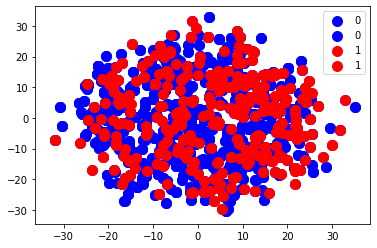

In [99]:
fig, ax = plt.subplots()
for g in np.unique(Y_color):
    ix = np.where(Y_color == g)
    for i in ix:
        ax.scatter(np.array(X_transformed[:, 0])[i], np.array(X_transformed[:, 1])[i], c = dict_color[g], cmap= "Spectral", label = g, s = 100)
ax.legend()
plt.show()

In [100]:
#trying another embedding
X_pac = X_scaled.reshape(X_scaled.shape[0], -1)
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=1, FP_ratio=3, num_iters=600) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_pac, init="pca")

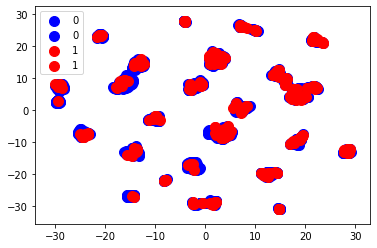

In [101]:
fig, ax = plt.subplots()
for g in np.unique(Y_color):
    ix = np.where(Y_color == g)
    for i in ix:
        ax.scatter(np.array(X_transformed[:, 0])[i], np.array(X_transformed[:, 1])[i], c = dict_color[g], cmap= "Spectral", label = g, s = 100)
ax.legend()
plt.show()

In [102]:
model=slm.LogisticRegression()
model.fit(X_scaled, Y_train)

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [103]:
print(model.coef_, model.intercept_)

[[ 0.24381271  0.51928224  0.05595326  0.17810109  0.042685    0.04325928
   0.09973471 -0.02703099  0.08415124  0.31418577 -0.0393934   0.05026495
  -0.04237879  0.18793963  0.09244798  0.00954132 -0.0896882  -0.02028892]] [-1.97660614]


In [104]:
#using the statsmodels api

X_scaled = smt.add_constant(X_scaled)
model2=Logit(Y_train, X_scaled).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.379082
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.1145
Time:                        19:36:12   Log-Likelihood:                -970.45
converged:                       True   LL-Null:                       -1095.9
Covariance Type:            nonrobust   LLR p-value:                 1.348e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9779      0.068    -29.234      0.000      -2.111      -1.845
x1             0.2448      0.

# Plotting some metrics

## Probability and threshold

In [117]:
# 1. Predicting the probability of default
y_prob = model.predict(X_scaled_test)

### Determining the optimal threshold of the default probability
$0.15p*820,000 + (1-0.15p)*70,000 = 750,000p \\$
-> p = 28/255. \
The threshold of high risk and low risk is 28/255.

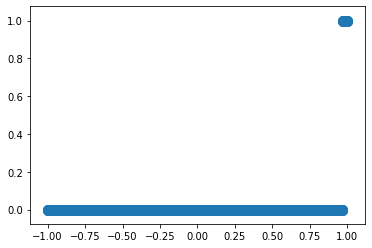

In [115]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(-1,1, 1098), sorted(y_prob), cmap= "Spectral", s = 100)
plt.show()

In [120]:
# 3. Predicting the label
y_pred = [1 if x > 28/255 else 0 for x in y_prob]

In [129]:
# Now we have our probabiltiy of default, we can construct a confusion matrix based on decision tree threshold we have computed 

cm = confusion_matrix(Y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[930   3]
 [150  15]]


In [131]:
print("The accuracy of the model is: \n")
print(sum(np.diag(cm)/np.sum(cm)))

The accuracy of the model is: 

0.8606557377049181


In [133]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(tpr, fpr)

In [134]:
print("The area under the ROC curve for this model is: \n")
print(roc_auc)

The area under the ROC curve for this model is: 

0.45615317158725516


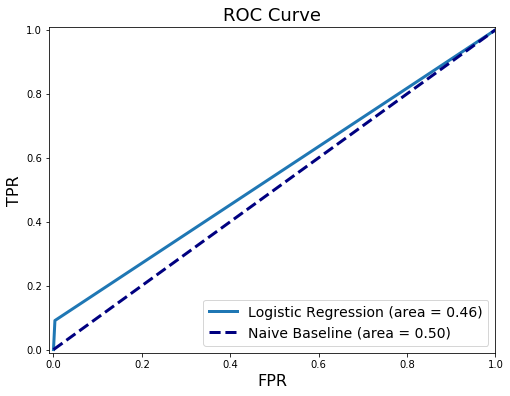

In [127]:
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()